In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# <img style="float: left; padding: 0px 10px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1920px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"  width="80" /> MCD3020 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Profesora:** Paula Aguirre <br>

## Tutorial 5: Limpieza de Datos II.

El set de datos que utilizaremos en este ejercicio proviene de la página `insideairbnb.com`, que provee datos obtenidos mediante scraping de las propiedades publicadas en distintas ciudades del mundo, con el fin de estudiar el impacto que esta plataforma tiene sobre los barrios y el desarrollo urbano. En este caso, procesaremos una muestra de las  propiedades disponibles en Santiago de Chile, Buenos Aires y Rio de Janeiro (actualizado a septiembre de 2022):

http://insideairbnb.com/index.html

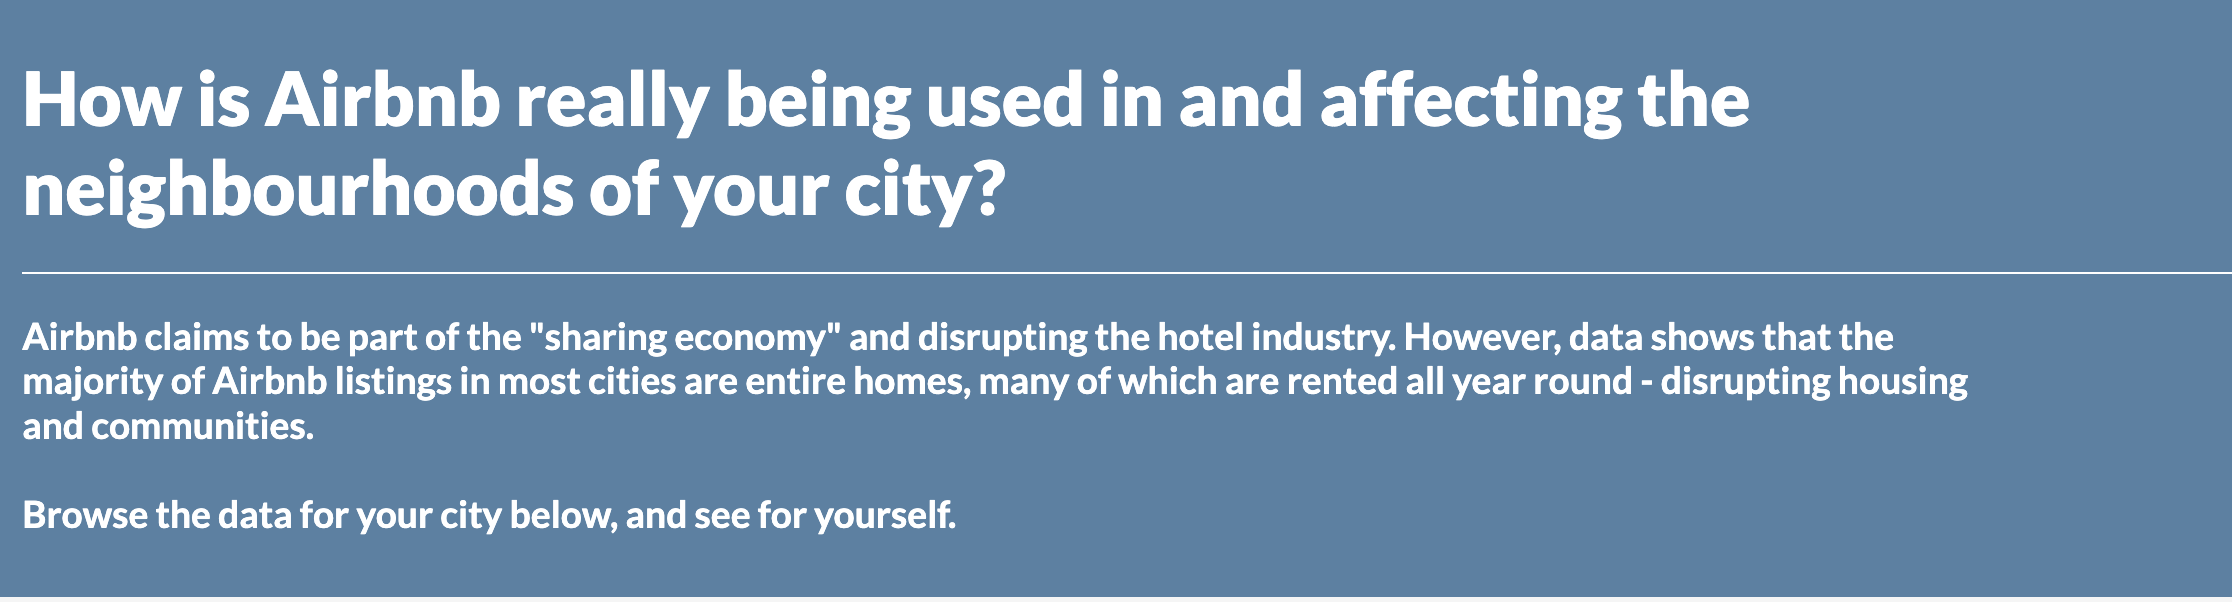

## 1. Lectura e inspección de datos.

In [2]:
df0=pd.read_csv('https://github.com/paguirre-uc/mds3020_2022/blob/main/semana3/listings_SA.csv?raw=true')
#df0=pd.read_csv('listings_SA.csv')
df0.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city
0,30207905,https://www.airbnb.com/rooms/30207905,20220922013624,2022-09-22,city scrape,Habitación privada en la mejor zona de San Telmo,<b>The space</b><br />Departamento ubicado a m...,"Ubicado en el mejor lugar de San Telmo, museos...",https://a0.muscache.com/pictures/04f06443-3b0e...,211951950,...,NaN,NaN,NaN,t,1,0,1,0,NaN,BA
1,676983,https://www.airbnb.com/rooms/676983,20220921172238,2022-09-22,city scrape,Penthouse ipanema,<b>The space</b><br />Nice coll studio penthou...,NaN,https://a0.muscache.com/pictures/8954305/d04f7...,4307081,...,4.88,4.63,NaN,f,55,46,9,0,0.07,RIO
2,666582298581856142,https://www.airbnb.com/rooms/666582298581856142,20220921172238,2022-09-22,city scrape,Quarto 17 Para 1 Pessoas - Perto do Aeroporto GIG,Cerque-se de estilo neste espaço excepcional.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,166827375,...,NaN,NaN,NaN,t,18,0,18,0,NaN,RIO
3,45462071,https://www.airbnb.com/rooms/45462071,20220922013638,2022-09-22,city scrape,"Moderno, central y full sanitizado","habitaciones modernas, muy bien aseadas y sani...",NaN,https://a0.muscache.com/pictures/81962bd1-9d66...,129429085,...,4.63,4.16,NaN,t,8,0,8,0,0.78,SCL
4,684572466797400249,https://www.airbnb.com/rooms/684572466797400249,20220921172238,2022-09-22,city scrape,"Apt Rock In Rio/ Arena - 3 quartos, 10 pessoas","Quer ir andando para o Rock in Rio, para o sho...","Barra da Tijuca, Rio de Janeiro, Brasil<br /><...",https://a0.muscache.com/pictures/miso/Hosting-...,156027501,...,5.00,5.00,NaN,f,1,1,0,0,2.00,RIO


## 2. Seleccionar y reetiquetar columnas.

In [78]:
df=df0[['id','city','neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type','room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'price','number_of_reviews','review_scores_rating']]

df.rename(columns={'neighbourhood_cleansed':'neighbourhood'},inplace=True)

## 3. Datos duplicados

In [79]:
#Chequeamos que no haya datos duplicados
df[df.duplicated(keep=False)].sort_values(by='id')

,id,city,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,number_of_reviews,review_scores_rating


## 4. Datos Faltantes o Nulos.

En particular es de interés el precio, por lo que chequeamos si existen datos nulos en este campo.

In [80]:
df[df['price'].isna()]

,id,city,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,number_of_reviews,review_scores_rating


## 5. Tipos de datos.

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10200 non-null  int64  
 1   city                  10200 non-null  object 
 2   neighbourhood         10200 non-null  object 
 3   latitude              10200 non-null  float64
 4   longitude             10200 non-null  float64
 5   property_type         10200 non-null  object 
 6   room_type             10200 non-null  object 
 7   accommodates          10200 non-null  int64  
 8   bathrooms_text        10175 non-null  object 
 9   bedrooms              9411 non-null   float64
 10  beds                  10080 non-null  float64
 11  price                 10200 non-null  object 
 12  number_of_reviews     10200 non-null  int64  
 13  review_scores_rating  7635 non-null   float64
dtypes: float64(5), int64(3), object(6)
memory usage: 1.1+ MB


La inspección de datos indica que algunas columnas de nuestro dataframe han sido interpretadas por pandas como un tipo de dato distinto al que se requiere para su adecuado uso y análisis.

#### Columnas de datos a convertir:
- `room_type`,`city`: category
- `price`: float
- `bathrooms_text`: float (pueden existir números decimales, por ejemplo: baño de visita)

En primer lugar, a variable `city` corresponde a una variable categórica, ya que sólo puede adquirir un conjunto de valores predeterminados:`RIO`, `BA`, `SCL`. Para verificar estos valores únicos, es de utilidad el método `unique()`.

https://pandas.pydata.org/docs/reference/api/pandas.unique.html

## 6. Variables categóricas.

En primer lugar, a variable `city` corresponde a una variable categórica, ya que sólo puede adquirir un conjunto de valores predeterminados:`RIO`, `BA`, `SCL`. Para verificar estos valores únicos, es de utilidad el método `unique()`.

https://pandas.pydata.org/docs/reference/api/pandas.unique.html

In [86]:
df['city'].unique()

array(['BA', 'RIO', 'SCL'], dtype=object)

La conversión de tipo de dato se hace fácilmente en este caso utilizando el método `astype()`:

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html


In [87]:
df['city']=df['city'].astype('category')

Veamos ahora la variable `property_type`. En este caso, el listado de valores existentes es bastante más largo, por  podría ser conveniente reclasificar los datos en sólo cuatro categorías más generales: `private_room`, `shared_room`, `entire_unit`y `other`(boat, camper, etc.).

In [88]:
df['room_type'].unique()

['Private room', 'Entire home/apt', 'Shared room', 'Hotel room']
Categories (4, object): ['Entire home/apt', 'Hotel room', 'Private room', 'Shared room']

In [89]:
df['room_type']=df['room_type'].astype('category')

## 6. Transformación de datos tipo string.  

Nos queda por convertir las variables relativas al precio y número de baños a datos de tipo numérico. Para esto, se requerirán algunas operaciones previas de limpieza y transformación de strings. 

En pandas, los métodos de python para el tratamiento de strings están implementados en forma vectorizada mediante el método `str`:

* https://pandas.pydata.org/docs/reference/api/pandas.Series.str.html#

Acá puedes revisar la documentación relativa a los métodos de transformación de strings disponibles en Python:

* https://www.w3schools.com/python/python_ref_string.asp
* https://docs.python.org/3/library/stdtypes.html#string-methods

Primero, necesitamos extraer el dato de número de baños de cada propiedad desde la columna `bathrooms_text`. Para mayor claridad, veamos su contenido.

In [90]:
df['bathrooms_text'].unique()

array(['1 shared bath', nan, '1 private bath', '2 baths', '1 bath',
       '2.5 baths', '1.5 baths', '3 baths', '3.5 baths', '4 baths',
       '5 baths', 'Half-bath', '1.5 shared baths', '7 baths', '6 baths',
       '5.5 baths', '2 shared baths', '4.5 baths', '5 shared baths',
       '3 shared baths', '2.5 shared baths', 'Shared half-bath',
       '0 shared baths', '3.5 shared baths', '6.5 baths', '11 baths',
       '8.5 baths', '0 baths', '8.5 shared baths', '17 baths',
       '4 shared baths', 'Private half-bath', '12 baths', '8 baths',
       '6 shared baths', '7.5 baths', '4.5 shared baths', '22 baths',
       '7 shared baths', '16 baths'], dtype=object)

Muchos datos contienen el número, y luego un texto que comienza con la palabra `bath`. Un método posible sería dividir el texto cuando aparece esta sequencia, y quedarse sólo con la primera parte que contiene el número. Esto es posible usando el método `split`:

https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html

In [91]:
df['bathrooms']=df['bathrooms_text'].str.split('bath',expand=True)[0]
df['bathrooms'].unique()

array(['1 shared ', nan, '1 private ', '2 ', '1 ', '2.5 ', '1.5 ', '3 ',
       '3.5 ', '4 ', '5 ', 'Half-', '1.5 shared ', '7 ', '6 ', '5.5 ',
       '2 shared ', '4.5 ', '5 shared ', '3 shared ', '2.5 shared ',
       'Shared half-', '0 shared ', '3.5 shared ', '6.5 ', '11 ', '8.5 ',
       '0 ', '8.5 shared ', '17 ', '4 shared ', 'Private half-', '12 ',
       '8 ', '6 shared ', '7.5 ', '4.5 shared ', '22 ', '7 shared ',
       '16 '], dtype=object)

Con esto logramos un avance, pero aún quedan datos con palabras como *shared*, *private*, etc. que es necesario limpiar. Por ejemplo, podemos generar un listado de estas palabras, y sucesivamente eliminarlas de la columna `bathrooms`, reemplazando (`replace`) por un caracter vacío. Además podemos eliminar espacios en blanco usando la función `strip()`.

https://pandas.pydata.org/pandas-docs/version/0.24/reference/api/pandas.Series.str.strip.html
https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html

In [92]:
#lista de palabras a eliminar
delete=['shared','Private half-','Shared half-','private','Half-']

#para cada palabra, reemplazar por caracter vacio y limpiar espacios en blanco
for word in delete:
    df['bathrooms']=df['bathrooms'].str.replace(word,'').str.strip()
    
df['bathrooms'].unique()

array(['1', nan, '2', '2.5', '1.5', '3', '3.5', '4', '5', '', '7', '6',
       '5.5', '4.5', '0', '6.5', '11', '8.5', '17', '12', '8', '7.5',
       '22', '16'], dtype=object)

En algunos casos, quedan valores vacíos, o y valores *nan*. Es devir, luego del procesamiento identificamos nuevos datos nulos, que es conveniente reemplazar por el valor `np.nan` para luego identificarlos y eliminarlos si es necesario usando `isna()`y `dropna()`.

In [93]:
#reemplazar datos vacíos por valor np.nan
df['bathrooms']=df['bathrooms'].replace('',np.nan)
#reemplazar text 'nan' por valor np.nan
df['bathrooms']=df['bathrooms'].replace('nan',np.nan)

Finalmente, estamos en condiciones de realizar la conversión a datos de tipo numérico (float):

In [94]:
df['bathrooms']=df['bathrooms'].astype('float64')

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    10200 non-null  int64   
 1   city                  10200 non-null  category
 2   neighbourhood         10200 non-null  object  
 3   latitude              10200 non-null  float64 
 4   longitude             10200 non-null  float64 
 5   property_type         10200 non-null  object  
 6   room_type             10200 non-null  category
 7   accommodates          10200 non-null  int64   
 8   bathrooms_text        10175 non-null  object  
 9   bedrooms              9411 non-null   float64 
 10  beds                  10080 non-null  float64 
 11  price                 10200 non-null  object  
 12  number_of_reviews     10200 non-null  int64   
 13  review_scores_rating  7635 non-null   float64 
 14  bathrooms             10156 non-null  float64 
dtypes:

El el caso de la columna `price`, se requiere también hacer una limpieza para eliminar caracteres como `$`, `,` y luego convertir a datos tipo `float`.

In [96]:
df['price']=df['price'].str.replace('$','')
df['price']=df['price'].str.replace(',','')
df['price']=df['price'].astype('float')


## 7. Estandarización de unidades.

Para los datos de precio, se requiere una transformación adicional: dado que los datos fueron extraídos de páginas de AirBnb en distintos países, los precios están expresados en la moneda de cada país. Por lo tanto, para poder analizarlos en conjunto, es necesario estandarizar los datos a una unidad o moneda común, por ejemplo, USD.

Para ello, primero definiremos la tasa de conversión de las monedas de cada país, a USD (información obtenida desde www.xe.com)

In [97]:
#brazilian real
BR=0.19 #USD

#chilean peso
CLP=0.00102 #USD

#argentinian peso
AP=0.0065

Con esta información, construimos una nueva columna `to_usd` que indica la tasa de conversión a aplicar a cada registro del dataframe, dependiendo de la ciudad en la cual se ubica la propiedad. Para ello, hacemos un mapeo en base a la column a `city`, y convertimos la nueva columna a `float` (en vez de `category`).

Una vez definido el mapa de reclasificación `{'RIO':BR,'BA':AP,'SCL':CLP}` , lo aplicamos usando la función `map`:

https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html

In [98]:
df['to_usd']=df['city'].map({'RIO':BR,'BA':AP,'SCL':CLP})
df['to_usd']=df['to_usd'].astype('float')
df['to_usd']

0        0.00650
1        0.19000
2        0.19000
3        0.00102
4        0.19000
          ...   
10195    0.00650
10196    0.19000
10197    0.19000
10198    0.19000
10199    0.19000
Name: to_usd, Length: 10200, dtype: float64

Con esto, es sencillo calcular finalmente la columna `price_usd`, como la multiplicación de `price`y `to_usd`:

In [99]:
df['price_USD']=df['price']*df['to_usd']

In [100]:
#Opcionalmente, podemos eliminar las columnas `price`, `to_usd` y` bathrooms_text` que ya no son necesarias.
df.drop(columns=['price','to_usd','bathrooms_text'],inplace=True)


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    10200 non-null  int64   
 1   city                  10200 non-null  category
 2   neighbourhood         10200 non-null  object  
 3   latitude              10200 non-null  float64 
 4   longitude             10200 non-null  float64 
 5   property_type         10200 non-null  object  
 6   room_type             10200 non-null  category
 7   accommodates          10200 non-null  int64   
 8   bedrooms              9411 non-null   float64 
 9   beds                  10080 non-null  float64 
 10  number_of_reviews     10200 non-null  int64   
 11  review_scores_rating  7635 non-null   float64 
 12  bathrooms             10156 non-null  float64 
 13  price_USD             10200 non-null  float64 
dtypes: category(2), float64(7), int64(3), object(2)
memory

## 8. Valores fuera de rango.

Con este dataframe más limpio y estandarizado, podemos analizar los valores de datos numéricos para identificar valores fuera de rango, y evaluar si corresponden a errores, o pueden ser datos válidos.
Para esto es de mucha ayuda el método  `describe`:

In [113]:
df.describe()

,id,latitude,longitude,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,bathrooms,price_USD
count,1.020000e+04,10200.000000,10200.000000,10200.000000,9411.000000,10080.000000,10200.000000,7635.000000,10156.000000,10200.000000
mean,1.540056e+17,-28.534839,-52.742371,3.513333,1.545851,2.293254,19.365000,4.709019,1.466916,117.555600
std,2.766268e+17,5.634065,10.392646,2.192433,1.081629,2.141422,39.417601,0.634017,0.924841,1194.072617
min,2.448000e+04,-34.693700,-70.841480,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.778642e+07,-34.580382,-58.436450,2.000000,1.000000,1.000000,0.000000,4.670000,1.000000,30.429750
50%,3.950753e+07,-23.030323,-43.561235,3.000000,1.000000,2.000000,4.000000,4.880000,1.000000,47.286870
75%,5.407707e+07,-22.972857,-43.197505,4.000000,2.000000,3.000000,20.000000,5.000000,2.000000,85.500000
max,7.204721e+17,-22.750940,-43.105930,16.000000,47.000000,91.000000,762.000000,5.000000,22.000000,112268.530000


Por ejemplo, hay un valor máximo de `price` de USD 112.268, lo cual parece inverosímil como precio de arriendo por noche. Para investigar, podemos chequear por ejemplo los 20 mayores valores,

In [116]:
df['price_USD'].nlargest(n=20)

1938    112268.5300
5430     19000.0000
6466     19000.0000
1145     15058.4500
189      10260.0000
9316      9817.4900
643       9408.9190
1848      9407.9830
2507      9407.9830
1037      8550.0000
2271      7600.0000
5099      4750.0000
1588      4731.0705
1229      4370.0000
8159      4036.4285
983       3800.0000
4822      3800.0000
497       3233.6100
2812      3233.6100
9722      3233.6100
Name: price_USD, dtype: float64

In [118]:
df.sort_values(by='price_USD',ascending=False)

,id,city,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,bathrooms,price_USD
1938,13879989,RIO,São Cristóvão,-22.899930,-43.230330,Shared room in home,Shared room,5,1.0,4.0,0,NaN,1.0,112268.530
6466,615818415678604089,RIO,Copacabana,-22.974860,-43.190600,Entire rental unit,Entire home/apt,16,1.0,2.0,0,NaN,1.0,19000.000
5430,685718700490335415,RIO,Freguesia (Jacarepaguá),-22.942708,-43.345734,Entire rental unit,Entire home/apt,16,3.0,16.0,0,NaN,3.0,19000.000
1145,50460855,RIO,Jardim Botânico,-22.960510,-43.223190,Entire villa,Entire home/apt,10,5.0,5.0,0,NaN,7.0,15058.450
189,40721389,RIO,Centro,-22.913940,-43.181640,Shared room in guest suite,Shared room,2,1.0,2.0,1,0.0,1.0,10260.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3589,31532986,BA,Villa Crespo,-34.600910,-58.438840,Private room in rental unit,Private room,1,1.0,1.0,16,5.0,NaN,4.550
9553,23086633,BA,Palermo,-34.590850,-58.421580,Private room in rental unit,Private room,1,1.0,3.0,1,1.0,1.0,3.900
3453,40836386,BA,Monserrat,-34.614500,-58.383570,Private room in rental unit,Private room,1,1.0,1.0,4,5.0,1.5,3.887
7878,30269531,BA,Villa Riachuelo,-34.689110,-58.477340,Private room in rental unit,Private room,1,1.0,1.0,0,NaN,1.0,3.250


Si vemos el primer registro, su precio de arriendo por noche es USD 122.268, pero se describe como un cuarto compartido. Muy probablemente se trata de un dato erróneo. Para este y otros datos extremos, ud. puede investigar los datos y aplicar criterios fundados para determinar si se trata de datos a corregir o eliminar. El análisis estadístico de los rangos de datos, y la identificación de datos fuera de rango, es parte también de la etapa de análisis exploratorio de datos.